<a href="https://colab.research.google.com/github/fringwald/CNN/blob/master/Data_augmentation_IMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data augmentation
In this notebook you can execute code snippets to get an understanding of how data augmentation works.

To execute the notebook click in the header above:

 Laufzeit -> alle ausführen

Excercises:

The output images can be found at the bottom of the page



1.   Apply different augmentations by removing the # at the beginning of the   line in the **Data augmentation** code block below. Additional information regarding the data augmentations can be found here https://pytorch.org/vision/stable/transforms.html

2. Play around with numerical values in brackets behind each transformation

      Remember to execute the notebook again after each change as described above (Laufzeit -> alles ausführen)
3.   Think about which augmentations are useful in the MNIST dataset vs. the CIFAR dataset.
      
      -> Rotation, Flipping, etc.
4. What other augmentation techniques can you think of? 

In [1]:
#@title Setting up the environment and all the necessary imports
#setting up the environment and all the necessary imports

import torch
import torchvision
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
print('Environment set up and all imports done!')

Environment set up and all imports done!


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz to /files/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz to /files/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz to /files/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz to /files/MNIST/raw

Data successfully loaded


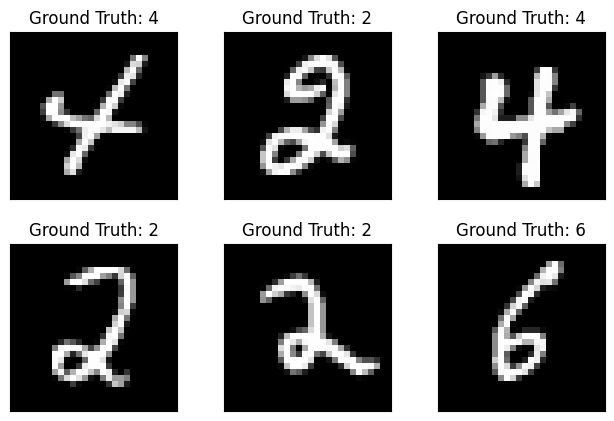

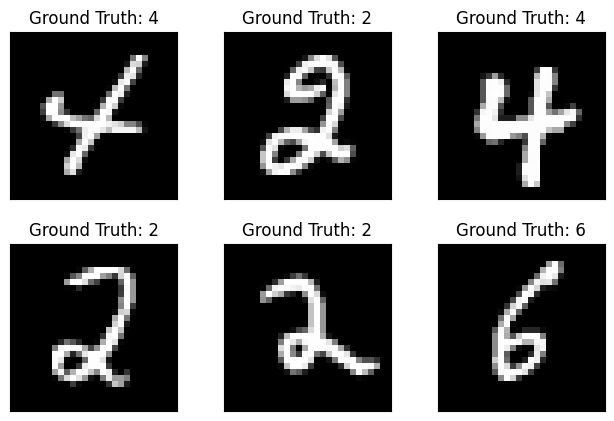

In [2]:
#@title Loading data and showing examples
#loading the data
data_transforms = torchvision.transforms.Compose([
                                        torchvision.transforms.ToTensor(), #transforming it to tensor for plotting
                                        ])
aug_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform= data_transforms),
                             batch_size= 64, shuffle=True)
print('Data successfully loaded')
#visualizing some samples to get a better understanding of images
examples = enumerate(aug_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation = 'nearest') #  cmap='gray',  interpolation='none'
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

#**Data augmentation**
In the next code section you can see different transforms applied on the images.

By removing the comment of a line (#), you can apply more transforms and see the output below.

In [7]:
data_transforms = torchvision.transforms.Compose([
                                        #torchvision.transforms.RandomHorizontalFlip(p=0.5), #Flipping the image horizontally with a probability of 0.5
                                        #torchvision.transforms.RandomVerticalFlip(p=0.5), #Flipping the image vertically with a probability of 0.5
                                        #torchvision.transforms.RandomRotation([-180,180]), #Rotating the image between [-180°, 180°] randomly
                                        #torchvision.transforms.RandomAffine([-90,90]), #affine transformation to keep center invariant
                                        torchvision.transforms.ToTensor(), #transforming it to tensor for plotting
                                        #torchvision.transforms.Normalize((0.5,),(0.5,))
                                        ])


To change the dataset which you load simply replace MNIST with CIFAR10 in the section below.


Data successfully loaded


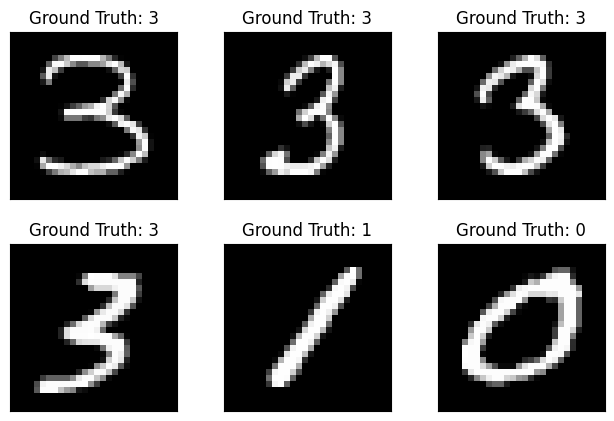

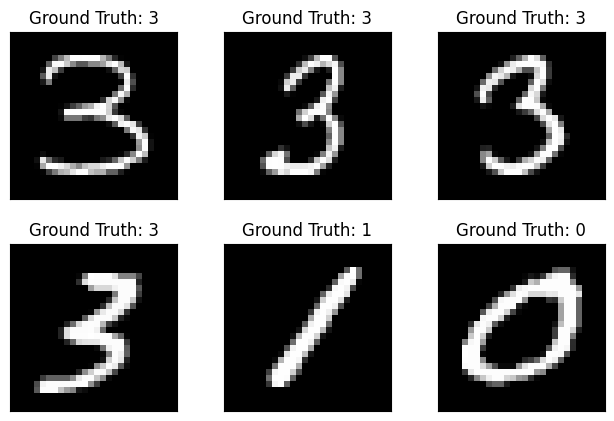

In [8]:
#@title Visualizing augmented images
aug_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform= data_transforms),
                             batch_size= 64, shuffle=True)
print('Data successfully loaded')
examples = enumerate(aug_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation = 'nearest') #  cmap='gray',  interpolation='none'
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig